In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
# import matplotlib and set inline for jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
irisdata = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [5]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
target          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
irisdata.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = irisdata.loc[:, features].values
y = irisdata.loc[:,['target']].values

In [8]:
# Using PCA to reduce the 4 dimensions(features) to fit in a 3D plot
pca = PCA(n_components=3)
Components = pca.fit_transform(x)
pcadf = pd.DataFrame(data = Components, columns = ['First Component', 'Second Component', 'Third Component'])

In [9]:
result = pd.concat([pcadf, irisdata[['target']]], axis = 1)

In [10]:
a = result['First Component']
b = result['Second Component']
c = result['Third Component']

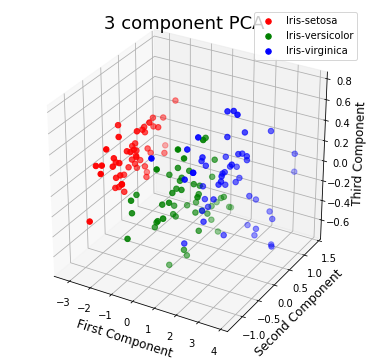

In [29]:
fig = plt.figure(figsize = (14,14))
ax = fig.add_subplot(2, 2, 2, projection = '3d')
ax.set_xlabel('First Component', fontsize = 12)
ax.set_ylabel('Second Component', fontsize = 12)
ax.set_zlabel('Third Component', fontsize = 12)
ax.set_title('3 component PCA', fontsize = 18)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indice = result['target'] == target
    ax.scatter(result.loc[indice, 'First Component']
               , result.loc[indice,  'Second Component']
               , result.loc[indice, 'Third Component']
               , c = color
               , s = 30)
ax.legend(targets)
ax.grid(b=True)
plt.show()